# This code analyzes emotion counts in guardiandata.csv

### Import necessary libraries

pandas is a library that helps to analyze data

matplotlib is a library for data visualization

numpy is a library that helps to manipulate large arrays

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

### Import dataset

In [3]:
dataset = pd.read_csv("/Users/aliabraley/Desktop/guardian_emotion_data.csv")

dataset.head()

,Unnamed: 0,title,content,country,anger,joy
0,0,willy caballero finally gets part to play in r...,willy caballero finally gets part to play in r...,argentina,2,3
1,1,protests such as don’t kill live music seem to...,protests such as don’t kill live music seem to...,na,3,1
2,2,last four refugee children leave nauru for res...,last four refugee children leave nauru for res...,nauru,0,1
3,3,house passes first major gun control legislati...,house passes first major gun control legislati...,na,3,2
4,4,labour splits exposed as mp is suspended over ...,labour splits exposed as mp is suspended over ...,na,2,3


### Tabulate articles by country in dataset and save to dataframe

In [4]:
country_tab = pd.crosstab(index=dataset["country"],  
                              columns="count")      

country_tab

col_0,count
country,
afghanistan,16
algeria,3
angola,3
anguilla,1
antarctica,4
argentina,20
armenia,4
australia,345
austria,9


### Generate descriptive statistics on country assignment in dataframe

Sort country by the amount of articles assigned to it. 

Sum the total amount of articles in the dataset.

Generate pie chart showing the number of articles assigned a country in the data. 

In [8]:
country_sorted = country_tab.sort_values(by='count', na_position='first')
country_sorted

col_0,count
country,
mongolia,1
tonga,1
greenland,1
grenada,1
guam,1
cook islands,1
guyana,1
christmas island,1
senegal,1


In [5]:
sum(country_tab["count"])

3911

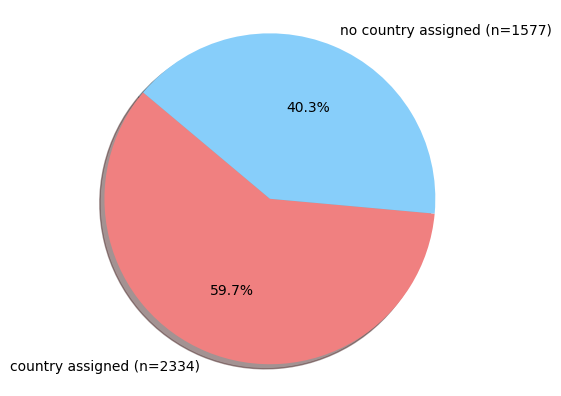

In [16]:
labels = 'country assigned (n=2334)', 'no country assigned (n=1577)'
sizes = [2334, 1577]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.savefig("/Users/aliabraley/Desktop/countries_assigned.png")

plt.show()

### Generate dataframes for regions

I use Matt Rosenberg's regional assignments that can be found at: https://www.thoughtco.com/official-listing-of-countries-world-region-1435153.   
I additionally differentiate western and eastern europe. 

In [38]:
asia = dataset.loc[dataset['country'].isin(['bangladesh', 'cambodia', 'china', 'singapore', 'sri lanka', 'taiwan', 'thailand'])]

mena = dataset.loc[dataset['country'].isin(['afghanistan', 'algeria', 'bahrain', 'saudi arabia', 'somalia', 'tunisia', 'turkey', 'united arab emirates', 'yemen'])]

w_europe = dataset.loc[dataset['country'].isin(['austria', 'belgium', 'san marino', 'spain', 'sweden', 'switzerland','united kingdom'])]

e_europe = dataset.loc[dataset['country'].isin(['armenia', 'azerbaijan', 'belarus', 'bulgaria', 'slovakia', 'slovenia', 'ukraine'])]

north_am = dataset.loc[dataset['country'].isin(['canada', 'united states'])]

latin_am = dataset.loc[dataset['country'].isin(['argentina', 'brazil', 'chile', 'venezuela'])]

ss_africa = dataset.loc[dataset['country'].isin(['angola', 'benin', 'botswana', 'cameroon', 'chad', 'senegal', 'sierra leone', 'south africa', 'sudan', 'tanzania', 'uganda', 'zaire', 'zimbabwe'])]

australia = dataset.loc[dataset['country'].isin(['australia'])]

### Generate bar chart to show prevelance of articles assigned by region

Obtain the length of each region's dataframe. 

Input data for bar chart. 

Generate bar chart. 

In [85]:
asia_count = len(asia)
mena_count = len(mena)
w_europe_count = len(w_europe)
e_europe_count = len(e_europe)
north_am_count = len(north_am)
latin_am_count = len(latin_am)
ss_africa_count = len(ss_africa)
australia_count = len(australia)

In [40]:
region_count_list = [['asia', asia_count], ['mena', mena_count], ['w_europe', w_europe_count], ['e_europe', e_europe_count], ['north_am', north_am_count], ['latin_am', latin_am_count], ['ss_africa', ss_africa_count], ['australia', australia_count]] 
region_count_df = pd.DataFrame(region_count_list, columns = ['region', 'num_articles']) 
region_count_df_sorted = region_count_df.sort_values(by='num_articles')
region_count_df_sorted

,region,num_articles
3,e_europe,34
6,ss_africa,77
2,w_europe,96
1,mena,98
5,latin_am,104
0,asia,139
4,north_am,206
7,australia,345


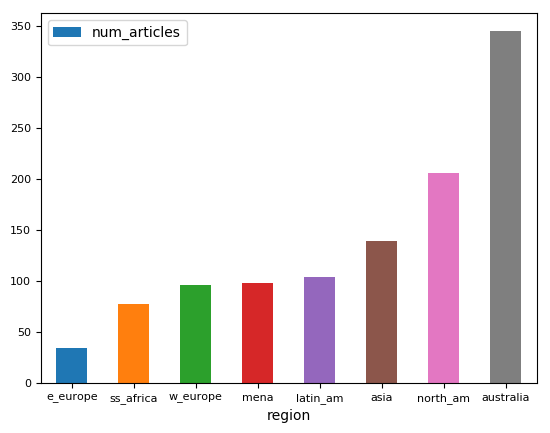

In [61]:
region_count_df_sorted.plot.bar(x="region", y="num_articles", rot=0, fontsize=8)

plt.savefig("/Users/aliabraley/Desktop/region_count_bar.png")

plt.show()

### Generate bar chart to show counts of angry words by region

Obtain the sum of angry words for each region.

Input data for bar chart.

Generate bar chart.

In [64]:
asia_count_angry = sum(asia['anger'])
mena_count_angry = sum(mena['anger'])
w_europe_count_angry = sum(w_europe['anger'])
e_europe_count_angry = sum(e_europe['anger'])
north_am_count_angry = sum(north_am['anger'])
latin_am_count_angry = sum(latin_am['anger'])
ss_africa_count_angry = sum(ss_africa['anger'])
australia_count_angry = sum(australia['anger'])

In [65]:
angry_count_list = [['asia', asia_count_angry], ['mena', mena_count_angry], ['w_europe', w_europe_count_angry], ['e_europe', e_europe_count_angry], ['north_am', north_am_count_angry], ['latin_am', latin_am_count_angry], ['ss_africa', ss_africa_count_angry], ['australia', australia_count_angry]] 
angry_count_df = pd.DataFrame(angry_count_list, columns = ['region', 'num_anger_words']) 
angry_count_df_sorted = angry_count_df.sort_values(by='num_anger_words')
angry_count_df_sorted

,region,num_anger_words
3,e_europe,44
1,mena,103
0,asia,119
2,w_europe,123
5,latin_am,146
6,ss_africa,163
4,north_am,376
7,australia,398


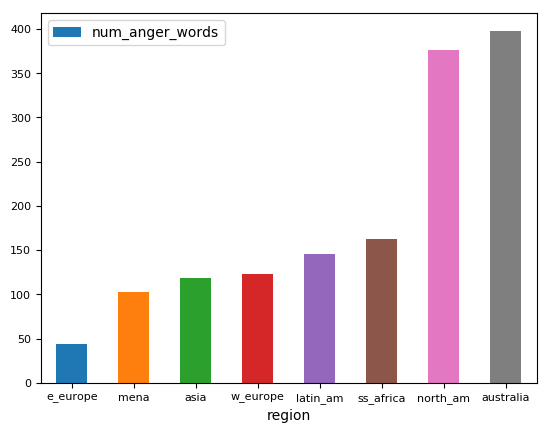

In [66]:
angry_count_df_sorted.plot.bar(x="region", y="num_anger_words", rot=0, fontsize=8)

plt.savefig("/Users/aliabraley/Desktop/anger_count_bar.png")

plt.show()

### Generate bar chart to show counts of joyful words by region

Obtain the sum of joyful words for each region.

Input data for bar chart.

Generate bar chart.

In [67]:
asia_count_joy = sum(asia['joy'])
mena_count_joy = sum(mena['joy'])
w_europe_count_joy = sum(w_europe['joy'])
e_europe_count_joy = sum(e_europe['joy'])
north_am_count_joy = sum(north_am['joy'])
latin_am_count_joy = sum(latin_am['joy'])
ss_africa_count_joy = sum(ss_africa['joy'])
australia_count_joy = sum(australia['joy'])

In [68]:
joy_count_list = [['asia', asia_count_joy], ['mena', mena_count_joy], ['w_europe', w_europe_count_joy], ['e_europe', e_europe_count_joy], ['north_am', north_am_count_joy], ['latin_am', latin_am_count_joy], ['ss_africa', ss_africa_count_joy], ['australia', australia_count_joy]] 
joy_count_df = pd.DataFrame(joy_count_list, columns = ['region', 'num_joy_words']) 
joy_count_df_sorted = joy_count_df.sort_values(by='num_joy_words')
joy_count_df_sorted

,region,num_joy_words
3,e_europe,134
2,w_europe,316
5,latin_am,360
1,mena,403
6,ss_africa,410
0,asia,489
4,north_am,962
7,australia,1377


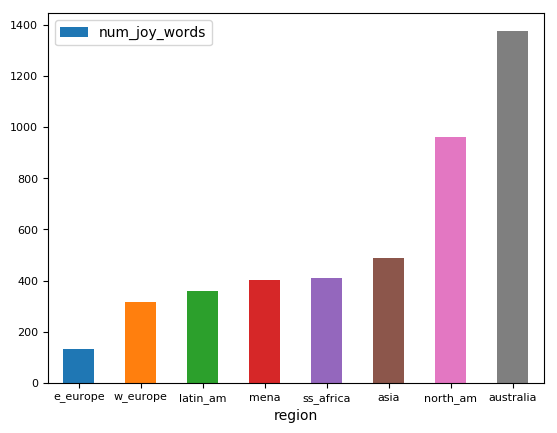

In [69]:
joy_count_df_sorted.plot.bar(x="region", y="num_joy_words", rot=0, fontsize=8)

plt.savefig("/Users/aliabraley/Desktop/joy_count_bar.png")

plt.show()

### Generate grouped bar chart to visualize differences in prevelance versus emotional tone

Create dataframe.

Generate and export grouped bar chart. 

In [72]:
count_df = pd.concat([region_count_df, angry_count_df, joy_count_df], axis=1)
count_df

,region,num_articles,region,num_anger_words,region,num_joy_words
0,asia,139,asia,119,asia,489
1,mena,98,mena,103,mena,403
2,w_europe,96,w_europe,123,w_europe,316
3,e_europe,34,e_europe,44,e_europe,134
4,north_am,206,north_am,376,north_am,962
5,latin_am,104,latin_am,146,latin_am,360
6,ss_africa,77,ss_africa,163,ss_africa,410
7,australia,345,australia,398,australia,1377


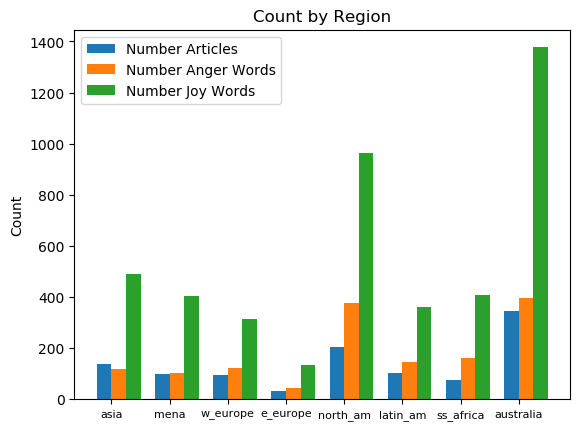

In [80]:
N = 8
num_articles = count_df["num_articles"]
num_anger_words = count_df["num_anger_words"]
num_joy_words = count_df["num_joy_words"]

ind = np.arange(N) 
width = 0.25       
plt.bar(ind, num_articles, width, label='Number Articles')
plt.bar(ind + width, num_anger_words, width,
    label='Number Anger Words')
plt.bar(ind + width*2, num_joy_words, width,
    label='Number Joy Words')

plt.ylabel('Count')
plt.title('Count by Region')

plt.xticks(ind + width / 2, ('asia', 'mena', 'w_europe', 'e_europe', 'north_am', 'latin_am', 'ss_africa', 'australia'), fontsize = 8)
plt.legend(loc='best')

plt.savefig("/Users/aliabraley/Desktop/count_bar.png")

plt.show()

### Proportion Angry by Region

Generate proportion of the number of angry words found per article for each region.

Generate bar chart of proportion of angry words found per article for each region.

In [87]:
prop_angry_asia =  asia_count_angry  / asia_count

prop_angry_mena = mena_count_angry / mena_count

prop_angry_w_europe = w_europe_count_angry / w_europe_count

prop_angry_e_europe = e_europe_count_angry / e_europe_count

prop_angry_north_am = north_am_count_angry / north_am_count

prop_angry_latin_am = latin_am_count_angry / latin_am_count

prop_angry_ss_africa = ss_africa_count_angry / ss_africa_count

prop_angry_australia = australia_count_angry / australia_count


In [88]:
angry_prop_list = [['asia', prop_angry_asia], ['mena', prop_angry_mena], ['w_europe', prop_angry_w_europe], ['e_europe', prop_angry_e_europe], ['north_am', prop_angry_north_am], ['latin_am', prop_angry_latin_am], ['ss_africa', prop_angry_ss_africa], ['australia', prop_angry_australia]] 
angry_prop_df = pd.DataFrame(angry_prop_list, columns = ['region', 'angry_words_per_article']) 
angry_prop_df_sorted = angry_prop_df.sort_values(by='angry_words_per_article')
angry_prop_df_sorted

,region,angry_words_per_article
0,asia,0.856115
1,mena,1.051020
7,australia,1.153623
2,w_europe,1.281250
3,e_europe,1.294118
5,latin_am,1.403846
4,north_am,1.825243
6,ss_africa,2.116883


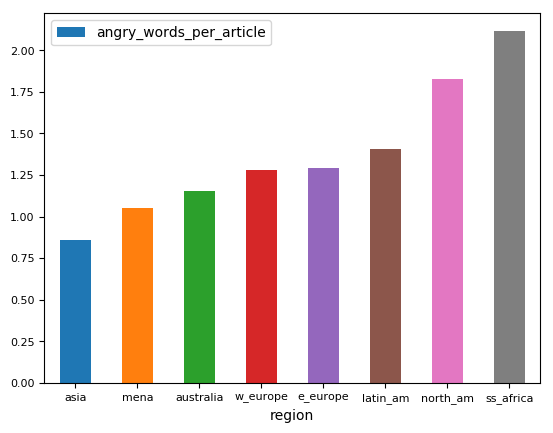

In [89]:
angry_prop_df_sorted.plot.bar(x="region", y="angry_words_per_article", rot=0, fontsize=8)

plt.savefig("/Users/aliabraley/Desktop/angry_prop_bar.png")

plt.show()

### Proportion Joyful by Region

Generate proportion of the number of joyful words found per article for each region.

Generate bar chart of proportion of joyful words found per article for each region.

In [90]:
prop_joy_asia =  asia_count_joy  / asia_count

prop_joy_mena = mena_count_joy / mena_count

prop_joy_w_europe = w_europe_count_joy / w_europe_count

prop_joy_e_europe = e_europe_count_joy / e_europe_count

prop_joy_north_am = north_am_count_joy / north_am_count

prop_joy_latin_am = latin_am_count_joy / latin_am_count

prop_joy_ss_africa = ss_africa_count_joy / ss_africa_count

prop_joy_australia = australia_count_joy / australia_count

In [91]:
joy_prop_list = [['asia', prop_joy_asia], ['mena', prop_joy_mena], ['w_europe', prop_joy_w_europe], ['e_europe', prop_joy_e_europe], ['north_am', prop_joy_north_am], ['latin_am', prop_joy_latin_am], ['ss_africa', prop_joy_ss_africa], ['australia', prop_joy_australia]] 
joy_prop_df = pd.DataFrame(joy_prop_list, columns = ['region', 'joy_words_per_article']) 
joy_prop_df_sorted = joy_prop_df.sort_values(by='joy_words_per_article')
joy_prop_df_sorted


,region,joy_words_per_article
2,w_europe,3.291667
5,latin_am,3.461538
0,asia,3.517986
3,e_europe,3.941176
7,australia,3.991304
1,mena,4.112245
4,north_am,4.669903
6,ss_africa,5.324675


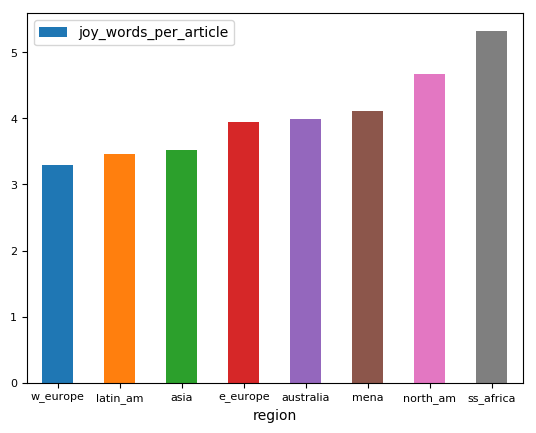

In [92]:
joy_prop_df_sorted.plot.bar(x="region", y="joy_words_per_article", rot=0, fontsize=8)

plt.savefig("/Users/aliabraley/Desktop/joy_prop_bar.png")

plt.show()

### Comparing proportion of angry versus joyful words by region

Generate grouped bar chart.

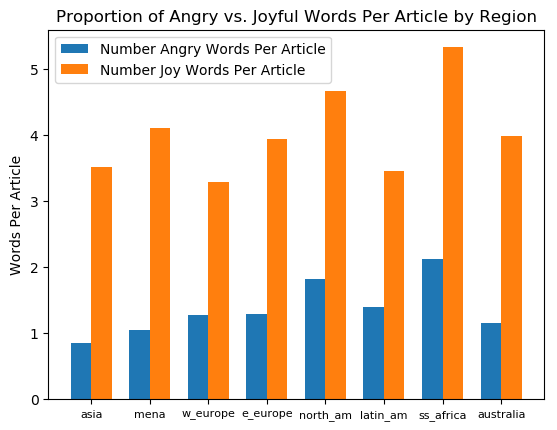

In [94]:
N = 8
prop_angry = angry_prop_df["angry_words_per_article"]
prop_joy = joy_prop_df["joy_words_per_article"]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, prop_angry, width, label='Number Angry Words Per Article')
plt.bar(ind + width, prop_joy, width,
    label='Number Joy Words Per Article')

plt.ylabel('Words Per Article')
plt.title('Proportion of Angry vs. Joyful Words Per Article by Region')

plt.xticks(ind + width / 2, ('asia', 'mena', 'w_europe', 'e_europe', 'north_am', 'latin_am', 'ss_africa', 'australia'), fontsize = 8)
plt.legend(loc='best')

plt.savefig("/Users/aliabraley/Desktop/prop_bar.png")

plt.show()